In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot

In [2]:
suic_rates = pd.read_csv("master.csv")
suic_rates

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## Knowledge Discovery Process

We start by looking at the data to study its distribution, find outliers, show rankings for relevant metrics, and analyze correlation between variables. The first step is to visualize the `suicides/100k pop` column and look for outliers. We chose to look at the `suicides/100k pop` column because this is a more robust measure than the `suicides_no` column, given that we can expect a country with more individuals to have higher suicide rates.

First of all, we need to acknowledge that the objects are partitioned in different classes (country, year, sex, and age forms a partition of the data). To make sure we are not dealing with some sort of Simpson's paradox, let's look at each part individually.

We would like to look at the following joint distributions, searching for anomalies and outliers:
- Suicide rates per year, overall
- Suicide rates per age ranges, overall
- Suicide rates per sex, overall
- Suicide rates per year, per country
- Suicide rates per year, per sex
- Suicide rates per country, per sex
- Suicide rates per age, per country
- Suicide rates per age, per sex

In [3]:
suic_rates_year_overall = suic_rates.groupby(["year"], as_index = False)["suicides/100k pop"].sum()
suic_rates_age_overall = suic_rates.groupby(["age"], as_index = False)["suicides/100k pop"].sum()
suic_rates_sex_overall = suic_rates.groupby(["sex"], as_index = False)["suicides/100k pop"].sum()
suic_rates_year_country = suic_rates.groupby(["year", "country"], as_index = False)["suicides/100k pop"].sum()
suic_rates_year_sex = suic_rates.groupby(["year", "sex"], as_index = False)["suicides/100k pop"].sum()
suic_rates_country_sex = suic_rates.groupby(["country", "sex"], as_index = False)["suicides/100k pop"].sum()
suic_rates_age_country = suic_rates.groupby(["country", "age"], as_index = False)["suicides/100k pop"].sum()
suic_rates_age_sex = suic_rates.groupby(["age", "sex"], as_index = False)["suicides/100k pop"].sum()

Text(0.5, 1.0, 'Suicide Rates per age, sex')

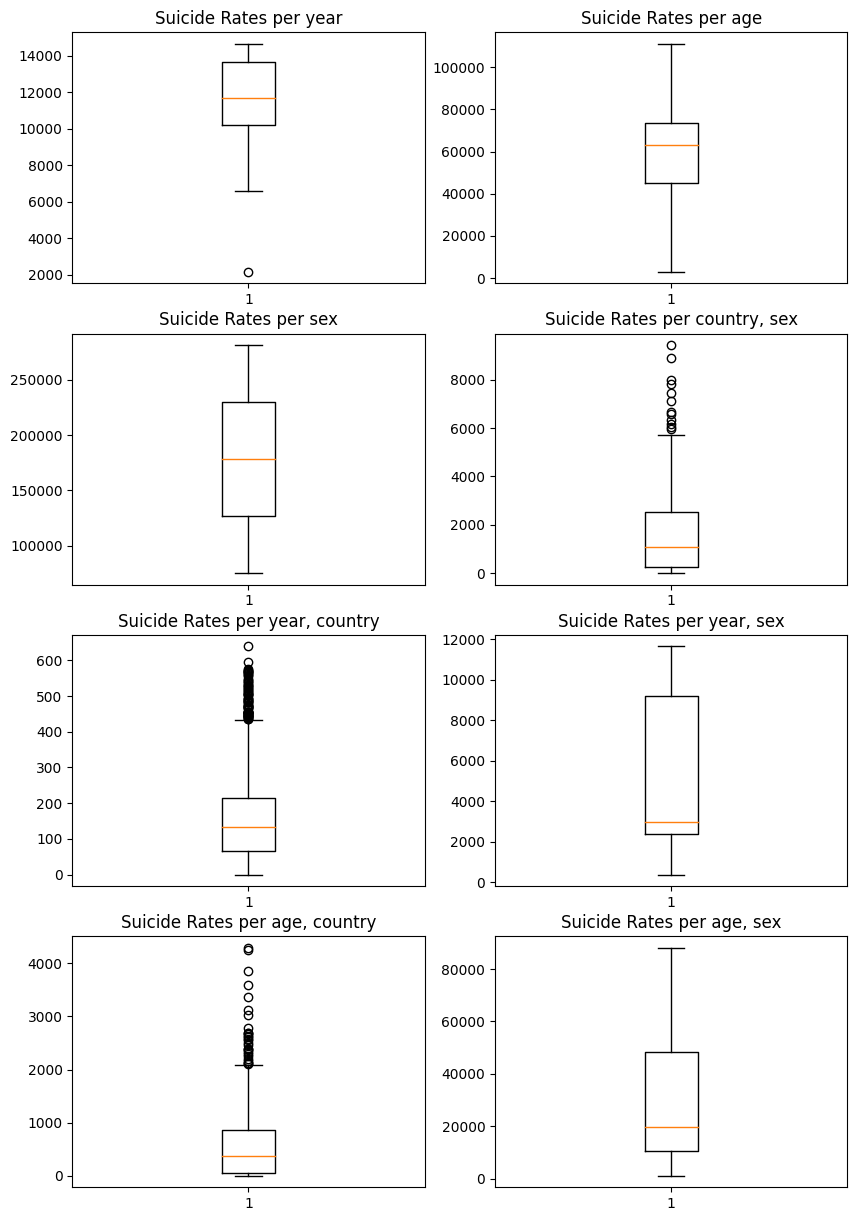

In [4]:
fig, axs = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(10)

axs[0, 0].boxplot(suic_rates_year_overall["suicides/100k pop"])
axs[0, 0].set_title('Suicide Rates per year')

axs[0, 1].boxplot(suic_rates_age_overall["suicides/100k pop"])
axs[0, 1].set_title('Suicide Rates per age')

axs[1, 0].boxplot(suic_rates_sex_overall["suicides/100k pop"])
axs[1, 0].set_title('Suicide Rates per sex')

axs[1, 1].boxplot(suic_rates_country_sex["suicides/100k pop"])
axs[1, 1].set_title('Suicide Rates per country, sex')

axs[2, 0].boxplot(suic_rates_year_country["suicides/100k pop"])
axs[2, 0].set_title('Suicide Rates per year, country')

axs[2, 1].boxplot(suic_rates_year_sex["suicides/100k pop"])
axs[2, 1].set_title('Suicide Rates per year, sex')


axs[3, 0].boxplot(suic_rates_age_country["suicides/100k pop"])
axs[3, 0].set_title('Suicide Rates per age, country')

axs[3, 1].boxplot(suic_rates_age_sex["suicides/100k pop"])
axs[3, 1].set_title('Suicide Rates per age, sex')

Particularly, for suicide rates per year and country, for suicide rates per country and sex, and for suicide rates per age and country, we notice quite a few outliers. Note that an outlier for these combinations indicates that the suicide rates for **a combination of `year` and `country`** is an anomaly, the suicide rates for **a combination of `country` and `sex`** is an anomaly, and the **combination of `age` and `country`** is an anomaly, respectively.

With that said, let's see which objects in our data correspond to those points.

In [5]:
outliers_year_country = suic_rates_year_country.sort_values(by="suicides/100k pop", ascending=False)[:10]
outliers_country_sex = suic_rates_country_sex.sort_values(by="suicides/100k pop", ascending=False)[:10]
outliers_age_country = suic_rates_age_country.sort_values(by="suicides/100k pop", ascending=False)[:10]

outliers_year_country["year-country"] = outliers_year_country.apply(lambda row: str(row.year) + "-" + row.country, axis=1)
outliers_country_sex["country-sex"] = outliers_country_sex.apply(lambda row: row.country + "-" + row.sex, axis=1)
outliers_age_country["age-country"] = outliers_age_country.apply(lambda row: row.country + "-" + row.age, axis=1)

In [ ]:
fig, ax = plt.subplots(3, 1)

norm = plt.Normalize(
    outliers_year_country["suicides/100k pop"].values.min(),
    outliers_year_country["suicides/100k pop"].values.max()
)
colors = plt.cm.Oranges(norm(outliers_year_country["suicides/100k pop"]))
ax[0].barh(outliers_year_country["year-country"], outliers_year_country["suicides/100k pop"], color=colors)
ax[0].set_title("Outliers for suicide rates grouped by year and country")
ax[0].invert_yaxis()

norm = plt.Normalize(
    outliers_country_sex["suicides/100k pop"].values.min(),
    outliers_country_sex["suicides/100k pop"].values.max()
)
colors = plt.cm.Oranges(norm(outliers_country_sex["suicides/100k pop"]))
ax[1].barh(outliers_country_sex["country-sex"], outliers_country_sex["suicides/100k pop"], color=colors)
ax[1].set_title("Outliers for suicide rates grouped by country and sex")
ax[1].invert_yaxis()

norm = plt.Normalize(
    outliers_age_country["suicides/100k pop"].values.min(),
    outliers_age_country["suicides/100k pop"].values.max()
)
colors = plt.cm.Oranges(norm(outliers_age_country["suicides/100k pop"]))
ax[2].barh(outliers_age_country["age-country"], outliers_age_country["suicides/100k pop"], color=colors)
ax[2].set_title("Outliers for suicide rates grouped by age and country")
ax[2].invert_yaxis()

 

fig.set_figheight(13)

Surprisingly, we see that the top 10 suicide rates grouped by country and sex do not show a specific tendency for country, but they are all males. Let's explore the relation between sex and suicide rates. Furthermore, we can see the highest rates for the country and age combination correspond to individuals with more than 75 years.

Now that we have highlighted the distributions of interest, and studied the anomalies, we will dive deeper into how the variables are correlated. Establishing a relation between the available variables and the suicide rate is important in order to find vulnerable countries and individuals and stablish policies that will help them. We start by studying the correlation between sex and suicide rates.

In [ ]:
suic_rates_year_sex_female = suic_rates_year_sex.loc[suic_rates_year_sex["sex"] == "female"]
suic_rates_year_sex_male = suic_rates_year_sex.loc[suic_rates_year_sex["sex"] == "male"]

plt.plot(
    suic_rates_year_sex_female["year"],
    suic_rates_year_sex_female["suicides/100k pop"],
    marker='o',
    label="Female"
)
plt.plot(
    suic_rates_year_sex_male["year"],
    suic_rates_year_sex_male["suicides/100k pop"],
    marker='o',
    label="Male"
)

for year in suic_rates_year_sex_female["year"]:
    plt.axvline(x=year, linestyle="dotted", color="grey")
    
plt.title("Number of suicide cases overall, per sex, throughout the years")
plt.legend()

Here we can notice a strong tendency showing us that individuals of the sex `male` are more likely to commit suicide, if we look at the whole world, throughout the years. Again, let's dive deeper into this analysis in order to avoid common mistakes such as the Simpson's Paradox.

We proceed by analyzing suicide cases per sex and age, in the whole world. For this analysis, we will use the mean number of cases, considering `suicides_no` instead of `suicides/100k pop`. To do that, we calculate the suicide rates' mean for each sex and age range, for all countries, across all years, and compare the resulting values for each sex using a grouped bar plot.

In [ ]:
# Pre-processing to sort values by age range
suic_numbers_age_sex_mean = suic_rates.groupby(["age", "sex"], as_index = False)["suicides_no"].mean()
suic_numbers_age_sex_mean["age_preffixed"] = suic_numbers_age_sex_mean.apply(lambda row: "05-14 years" if row[0] == "5-14 years" else row[0], axis=1)

fig, axs = plt.subplots()
fig.set_figwidth(10)

x = np.arange(len(suic_numbers_age_sex_mean["age_preffixed"].unique()))
width = 0.4
plt.bar(
    x-0.2,
    suic_numbers_age_sex_mean.sort_values(by="age_preffixed").loc[suic_numbers_age_sex_mean["sex"] == "female"]["suicides_no"],
    width,
    color="blue"
)
plt.bar(
    x+0.2,
    suic_numbers_age_sex_mean.sort_values(by="age_preffixed").loc[suic_numbers_age_sex_mean["sex"] == "male"]["suicides_no"],
    width,
    color="orange"
)

plt.xticks(x, suic_numbers_age_sex_mean.sort_values(by="age_preffixed")["age_preffixed"].unique())
plt.xlabel("Age ranges")
plt.ylabel("Suicide rates")
plt.legend(["Female", "Male"])

With this side-by-side comparison, we can see that of the `male` sex are more likely to commit suicide, for all age ranges. Next, we will perform a similar analyzes, but taking into account how those mean values changed throughout the years.

In [ ]:
suic_numbers_age_sex_mean_by_year = suic_rates.groupby(["age", "sex", "year"], as_index = False)["suicides_no"].mean()
suic_numbers_age_sex_mean_by_year["label"] = suic_numbers_age_sex_mean_by_year.apply(lambda row: row[0] + " " + str(row[1]), axis=1)

plt.figure(figsize=(10,6))
for label in suic_numbers_age_sex_mean_by_year["label"].unique():
    suic_numbers_age_sex_mean_by_year_class = suic_numbers_age_sex_mean_by_year.loc[suic_numbers_age_sex_mean_by_year["label"] == label]
    plt.plot(
        suic_numbers_age_sex_mean_by_year_class["year"],
        suic_numbers_age_sex_mean_by_year_class["suicides_no"],
        marker='o',
        label=label
    )
    
for year in suic_numbers_age_sex_mean_by_year["year"]:
    plt.axvline(x=year, linestyle="dotted", color="grey")

plt.title("Mean number of suicide cases per sex and age range, throughout the years")
plt.legend()

In the graph above we can see that across all years, individuals of the `male` can be expected to have higher suicide cases for most age ranges. In fact, the top 4 dominant mean number of suicide cases all correspond to individuals of the `male` sex.

Now that we have taken a look at how the age range and the sex jointly relate to the number of suicide cases, let's take a look at how the age ranges, by themselves, are related to suicide numbers and rates. We start by asking ourselves which are the age ranges with higher suicide numbers across all years and countries.

In [ ]:
suic_numbers_age_mean = suic_rates.groupby(["age"], as_index = False)["suicides_no"].mean()
suic_numbers_age_mean = suic_numbers_age_mean.sort_values(by="suicides_no", ascending=False)

fig, ax = plt.subplots()

norm = plt.Normalize(
    suic_numbers_age_mean["suicides_no"].values.min(),
    suic_numbers_age_mean["suicides_no"].values.max()
)
colors = plt.cm.Oranges(norm(suic_numbers_age_mean["suicides_no"]))
ax.barh(suic_numbers_age_mean["age"], suic_numbers_age_mean["suicides_no"], color=colors)
ax.set_title("Age ranges with higher suicide numbers' mean across all years and countries")
ax.invert_yaxis()

In order to have a more detailed comprehension of the numbers shown above, it would also be interesting to understand how each age range's suicide numbers behave throughout the years. 

In [ ]:
suic_numbers_age_mean_by_year = suic_rates.groupby(["age", "year"], as_index = False)["suicides_no"].mean()
# suic_numbers_age_mean_by_year["label"] = suic_numbers_age_mean_by_year.apply(lambda row: row[0] + " " + str(row[1]), axis=1)

plt.figure(figsize=(10,6))
for age in suic_numbers_age_mean_by_year["age"].unique():
    suic_numbers_age_mean_by_year_class = suic_numbers_age_mean_by_year.loc[suic_numbers_age_mean_by_year["age"] == age]
    plt.plot(
        suic_numbers_age_mean_by_year_class["year"],
        suic_numbers_age_mean_by_year_class["suicides_no"],
        marker='o',
        label=age
    )
    
for year in suic_numbers_age_mean_by_year["year"]:
    plt.axvline(x=year, linestyle="dotted", color="grey")

plt.title("Mean number of suicide cases per age range, throughout the years")
plt.legend()

The graph shows us that individuals with age between 35 and 54 years are more likely to commit suicide, across all countries, and throughout all the years present in the data. However, **it is important to notice that the two biggest classes, namely 35-54 years and 55-74 years, represent an age range greater than the other classes**, thus, we can expect them to naturally represent the biggest numbers of suicide cases. 

### TO-DO: Line plot with GDP per capita and suicide rates for each pair country-year?

Up to this point we have explored our data and found out some really interesting points, including:
- Individuals of the sex `male` are more likely to commit suicides. This is holds for almost all countries, years, and age ranges on the data.
- The bulk of suicide cases lies within the age ranges from 25 to 54 years. However, using this data we can not see any particular age range in between that contains a significantly greater number of suicides than the others.
- When we extend our analysis to consider the joint distribution of suicide rate per year and country, we notice that the outliers correspond to poor countries in troublesome years.
- When we extend our analysis to consider the joint distribution of suicide rate per country and sex, we notice that the greatest values correspond to individuals of the `male` sex.
- When we extend our analysis to consider the joint distribution of suicide rate per country and age, surprisingly we see that the greatest suicide rates come from individuals with more than 75 years, a tendency which we do not see when looking only at the ages. 

Now let's extend our analysis to include a country's GDP and GDP per capita. We start by analysing the GDP per capita growth for each country throughout the years. In sequence, it would be particularly interesting to look at the outliers of suicide rates for the joint `year` and `country` distribution, namely Lithuania between 1990 and 200, Hundary in the years 1991 and 1992, and Russian Federation in the year 1994 (see table below). 

In [ ]:
outliers_year_country

In [ ]:
gdp_per_capita_year_country_mean = suic_rates.groupby(["year", "country"], as_index = False)["gdp_per_capita ($)"].mean()

plt.figure(figsize=(10,6))
for country in gdp_per_capita_year_country_mean["country"].unique():
    gdp_per_capita_year_country_mean_class = gdp_per_capita_year_country_mean.loc[gdp_per_capita_year_country_mean["country"] == country]
    plt.plot(
        gdp_per_capita_year_country_mean_class["year"],
        gdp_per_capita_year_country_mean_class["gdp_per_capita ($)"],
        marker='o',
        label=country
    )

#for year in suic_numbers_age_mean_by_year["year"]:
#    plt.axvline(x=year, linestyle="dotted", color="grey")

plt.title("GDP Per Capita for each country throughout the years")
plt.legend()

Clearly, this visualization does not help us a lot at looking at countries and years of interest. Let's turn it into an interactive visualization and add a filter per country.

# Building a Dashboard

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt

# To make visualizations
from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas


import panel as pn
from panel.template import DarkTheme
from panel.interact import interact
import hvplot.pandas  # Enable interactive https://hvplot.holoviz.org/getting_started/hvplot.html#basic-usage
import param

pn.extension()
pd.options.plotting.backend = 'holoviews'

### Scatterplot Widget

Allows us to create a scatterplot of any pair of columns. We can filter by country in order to zoom into particularities of the joint distributions 

In [ ]:
def filterTableByCountry(data, selection):
    data.loc[data['country'].isin(selection)]
    return data.loc[data['country'].isin(selection)]

def scatter(data, selection, x_selection, y_selection):
    return filterTableByCountry(data, selection).hvplot(
        x=x_selection, y=y_selection,
        by='country',
        kind='scatter',
        hover_cols=['country', 'suicide_no', 'gdp_per_capita ($)', 'year'],
        title='Relationship between Weight (kg) and Height (m), by Type',
        width=700, height=500,
        grid=True,
    )

def x_y_scatter(data):
    x_scatter = pn.widgets.Select(name="X", options=list(data.columns))
    y_scatter = pn.widgets.Select(name="Y", options=list(data.columns))
    return x_scatter, y_scatter

In [ ]:
x_scatter, y_scatter = x_y_scatter(suic_rates)
countries = list(suic_rates['country'].unique())[0:10]
check_list = pn.widgets.CheckBoxGroup(name='Checkbox Group', value=countries, options=countries)
scatter_data = pn.bind(scatter, suic_rates, check_list, x_scatter, y_scatter)

### Ranking Widget

Shows us the top ten countries with highest suicide rate. The suicide rate is calculated as follows:
1. For every country, sum the value of `suicides/100k pop` for all nominal classes, i.e., `sex`, `age`, for each year
2. Take the mean value of that sum for each country

In [ ]:
suic_numbers_country_mean_raw = suic_rates.groupby(["country", "year"], as_index = False)["suicides/100k pop"].sum()
suic_numbers_country_mean = suic_numbers_country_mean_raw.groupby(["country"], as_index = False)["suicides/100k pop"].mean()
suic_numbers_country_std = suic_numbers_country_mean_raw.groupby(["country"], as_index = False)["suicides/100k pop"].std()
suic_numbers_country_mean_ordered = suic_numbers_country_mean.sort_values(by="suicides/100k pop", ascending=False)[:20]


suic_numbers_country_mean_ordered["std"] = suic_numbers_country_mean_ordered.apply(
    lambda row: suic_numbers_country_std.loc[suic_numbers_country_std["country"] == row[0]]["suicides/100k pop"].values[0],
    axis=1
)

In [ ]:
fig, ax = plt.subplots()

norm = plt.Normalize(
    suic_numbers_country_mean["suicides/100k pop"].values.min(),
    suic_numbers_country_mean["suicides/100k pop"].values.max()
)
colors = plt.cm.Oranges(norm(suic_numbers_country_mean_ordered["suicides/100k pop"]))
# ax.barh(suic_numbers_country_mean_ordered["country"], suic_numbers_country_mean_ordered["suicides/100k pop"], yerr=suic_numbers_country_mean_ordered["std"], color=colors)
ax.barh(suic_numbers_country_mean_ordered["country"], suic_numbers_country_mean_ordered["suicides/100k pop"], color=colors)
ax.set_title("Top 20 countries with highest suicide rates overall")
ax.invert_yaxis()

### Gender Barplot Widget

In [ ]:
suic_numbers_gender_total = suic_rates.groupby(["sex"], as_index = False)["suicides_no"].sum()
suic_numbers_gender_total["sex"] = suic_numbers_gender_total.apply(lambda row: row[0].capitalize(), axis=1)

fix, ax = plt.subplots()
ax.bar(suic_numbers_gender_total["sex"], suic_numbers_gender_total["suicides_no"], color=["blue", "orange"])
ax.get_yaxis().set_major_formatter(
    mplt.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

### Age Rank Widget

In [ ]:
suic_numbers_age_mean = suic_rates.groupby(["age"], as_index = False)["suicides_no"].mean()
suic_numbers_age_mean = suic_numbers_age_mean.sort_values(by="suicides_no", ascending=False)

fig, ax = plt.subplots()

norm = plt.Normalize(
    suic_numbers_age_mean["suicides_no"].values.min(),
    suic_numbers_age_mean["suicides_no"].values.max()
)
colors = plt.cm.Oranges(norm(suic_numbers_age_mean["suicides_no"]))
ax.barh(suic_numbers_age_mean["age"], suic_numbers_age_mean["suicides_no"], color=colors)
ax.set_title("Age ranges with higher suicide numbers' mean across all years and countries")
ax.invert_yaxis()

### GDP Per capita Line Plot Widget

In [ ]:
countries = list(gdp_per_capita_year_country_mean["country"].unique())
countries_filter_widget = pn.widgets.Select(name='Country', options=countries)
int_gdp_per_capita_year_country_mean = gdp_per_capita_year_country_mean.interactive()

# Create interaction with data
data_pipeline = (
    int_gdp_per_capita_year_country_mean[
        (int_gdp_per_capita_year_country_mean["country"] == countries_filter_widget)
    ]
)

In [ ]:
data_gdp = data_pipeline.iloc[:, -3:]
data_gdp.hvplot(
    kind='line',
    x="year",
    y="gdp_per_capita ($)",
    title='GDP Per Capita throughout the years', 
    rot=45
)

### Generate Dashboard

In [ ]:
# Template
sidebar=[
    pn.pane.Markdown('# Analysis of Suicide Rates across the world'),
    pn.pane.Markdown('#### This project uses data available on [Kaggle](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016) about Suicide Rates for all countries throughout the years 1985 to 2016.'),
    pn.pane.Markdown('## Filter by Country'),
    check_list
]

main = [
    pn.Row(scatter_data, pn.Column(x_scatter, y_scatter))
]

template = pn.template.FastListTemplate(
    # theme=DarkTheme,
    sidebar=sidebar,
    main=main,
    title = 'Suicide Rates Overview 1985 to 2016',
    accent_base_color='#d78929',
    header_background='#d78929',
    sidebar_footer='<br><br><a href="https://github.com/lucasclopesr/suic-rates-tp">GitHub Repository</a>',
    main_max_width='100%'
)

template.servable()
template.show()